In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.tree import plot_tree
from imblearn.combine import SMOTEENN
from sklearn.inspection import permutation_importance

In [7]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, message='use_inf_as_na')

In [8]:
df = pd.read_csv("./Telco-Customer-Churn.csv")

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Preprocessing

In [11]:
# Drop customerId column
df = df.drop('customerID', axis=1)

In [12]:
# convert datatype for 'TotalCharges'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [14]:
# remove unnecessary string
df["PaymentMethod"] = df["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

In [15]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [16]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
# df[df["TotalCharges"].isna()]

In [18]:
# missing_data = df.isna()

# plt.figure(figsize=(12, 8))
# sns.heatmap(missing_data, cbar=True, cmap='viridis')
# plt.title('Heatmap of Missing Values in Dataset')
# plt.show()

# Dropping missing Value

In [19]:
df=df.dropna(subset=['TotalCharges'],axis=0)

In [20]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

In [22]:
len(duplicate_rows)

22

In [23]:
duplicate_rows

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


In [24]:
df = df.drop_duplicates()

# Outliers

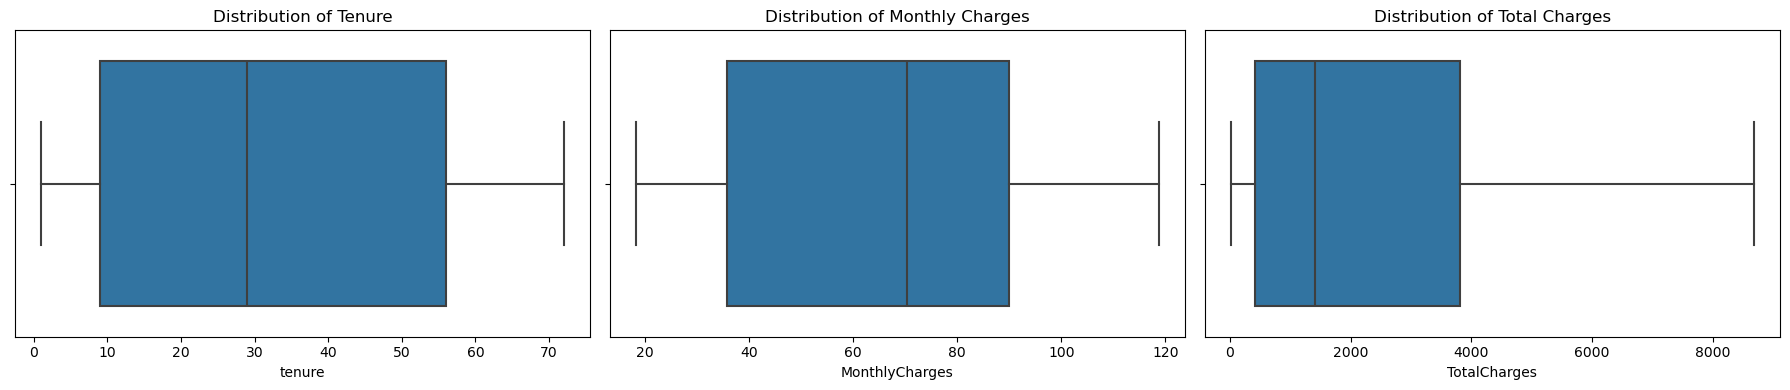

In [25]:
plt.figure(figsize=(18, 4))


plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="tenure")
plt.title('Distribution of Tenure')


plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="MonthlyCharges")
plt.title('Distribution of Monthly Charges')


plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="TotalCharges")
plt.title('Distribution of Total Charges')

plt.tight_layout()  
plt.show()

# Data analysis

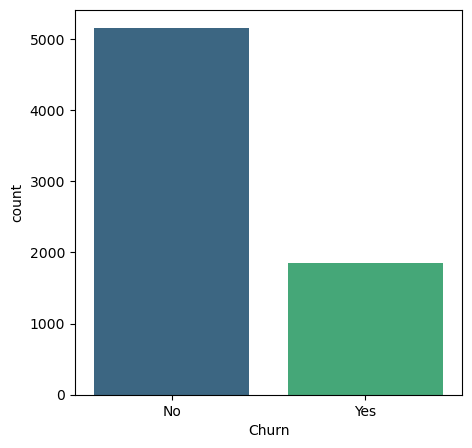

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(x = df["Churn"],palette="viridis");

imbalanced data set because both classes are not equally distributed

In [27]:
# corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
#        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
#        'PaymentMethod','Churn']],dtype="int").corr() 

In [28]:
corr_df  = pd.get_dummies(df,dtype="int").corr() 

In [29]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

tenure                                 -0.353339
Contract_Two year                      -0.301375
InternetService_No                     -0.228220
StreamingTV_No internet service        -0.228220
TechSupport_No internet service        -0.228220
DeviceProtection_No internet service   -0.228220
OnlineBackup_No internet service       -0.228220
OnlineSecurity_No internet service     -0.228220
StreamingMovies_No internet service    -0.228220
TotalCharges                           -0.198362
PaperlessBilling_No                    -0.190518
Contract_One year                      -0.177742
OnlineSecurity_Yes                     -0.170565
TechSupport_Yes                        -0.163980
Dependents_Yes                         -0.162366
Partner_Yes                            -0.148670
PaymentMethod_Credit card              -0.134052
InternetService_DSL                    -0.124152
PaymentMethod_Bank transfer            -0.117442
PaymentMethod_Mailed check             -0.091649
OnlineBackup_Yes    

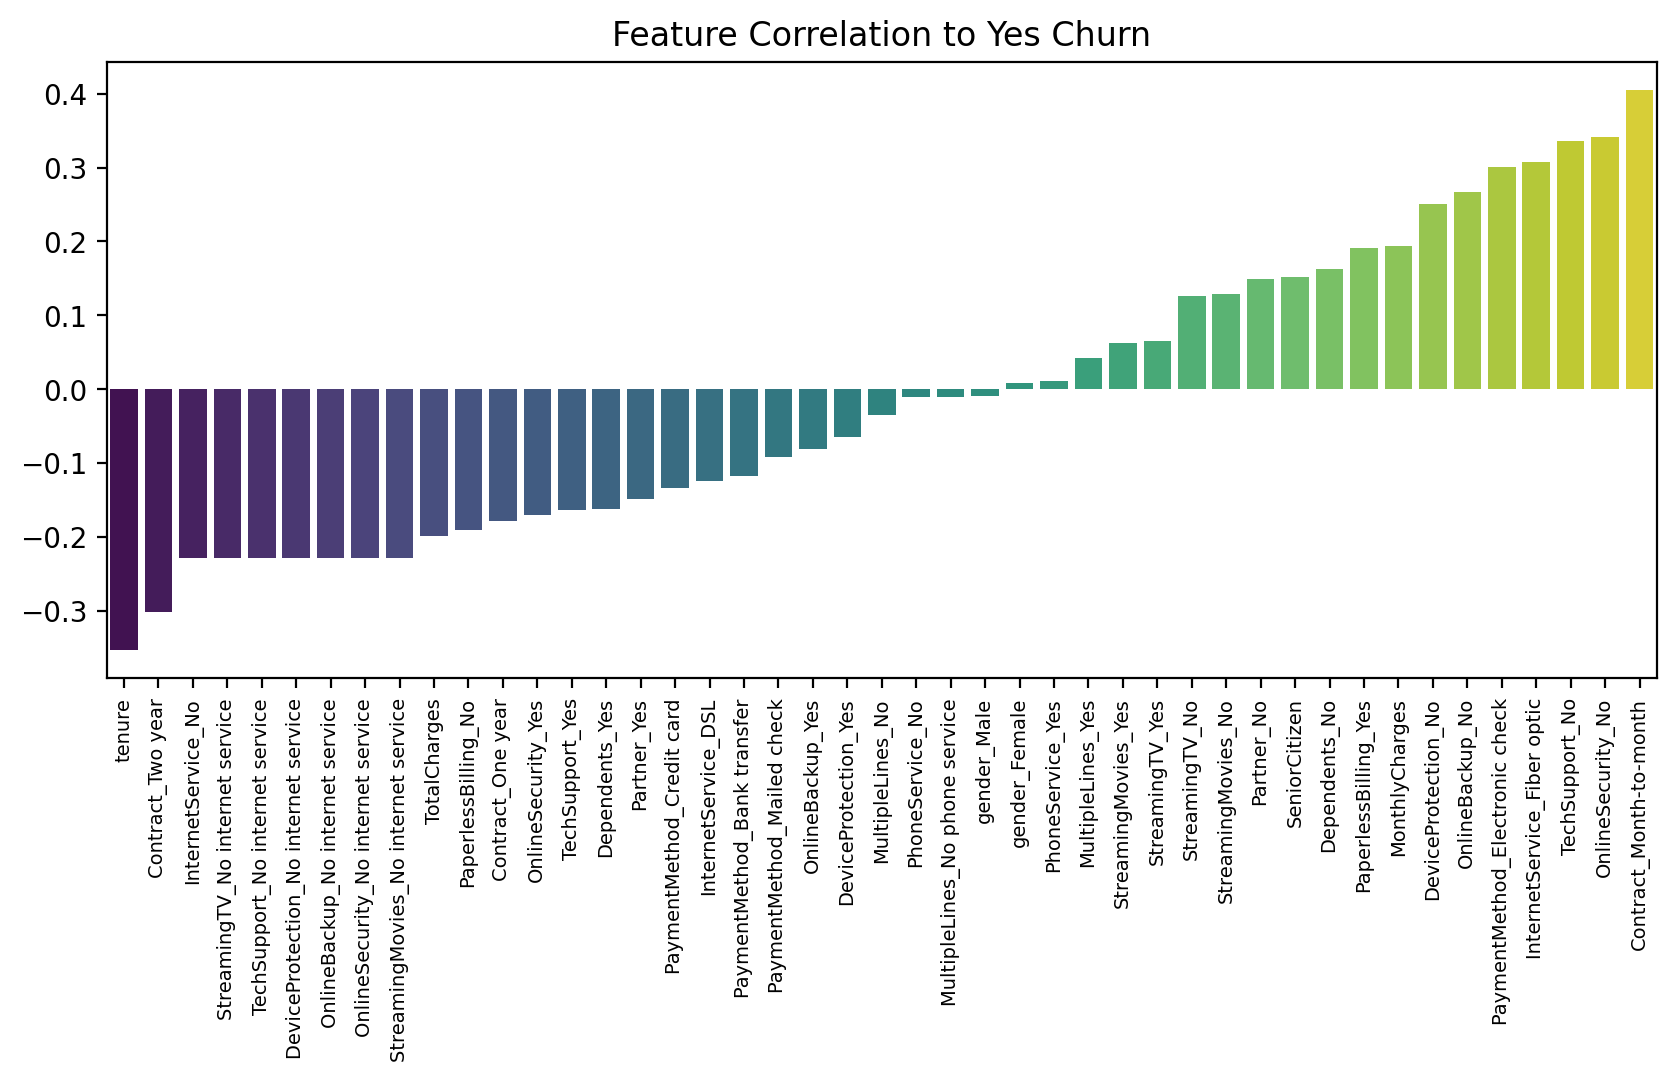

In [30]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values,palette="viridis")
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90,fontsize=7);

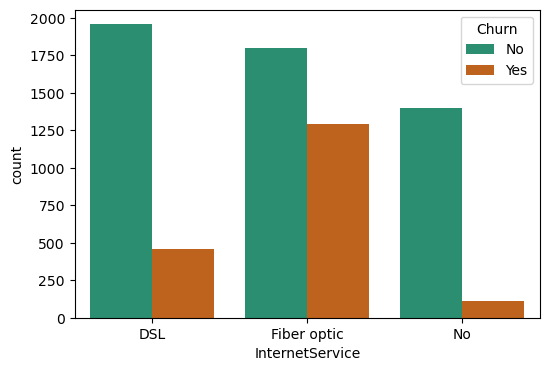

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x ="InternetService",palette="Dark2",hue="Churn");

fiber optics higher churn rate 

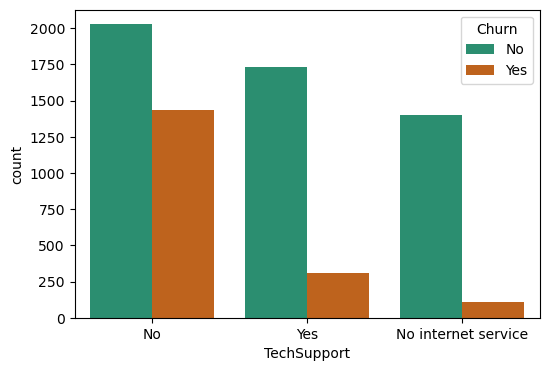

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x ="TechSupport",palette="Dark2",hue="Churn");

don’t have access to tech support tend to leave more frequently than those who do.

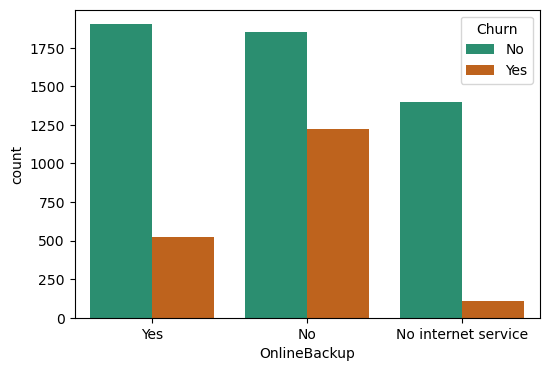

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x ="OnlineBackup",palette="Dark2",hue="Churn");

Customers without online backup and device protection have a higher churn rate.

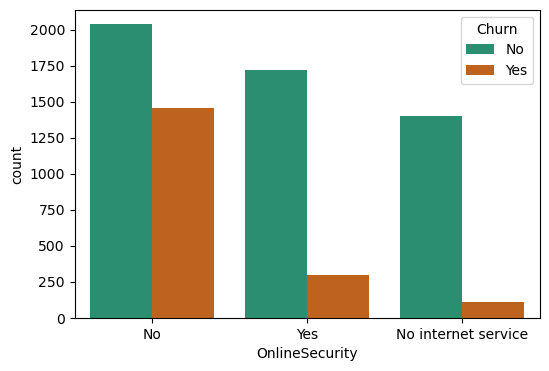

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x ="OnlineSecurity",palette="Dark2",hue="Churn");

much higher churn rate for customers without online security.

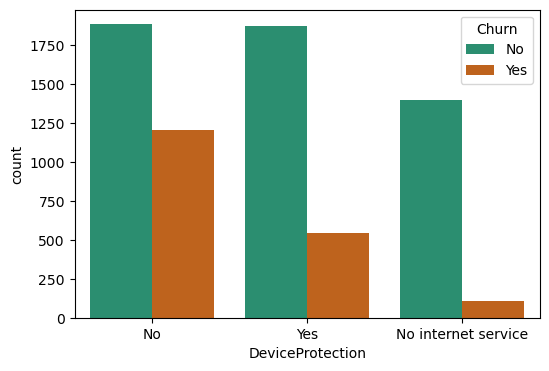

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x ="DeviceProtection",palette="Dark2",hue="Churn");

much higher churn rate for customers without Device protection

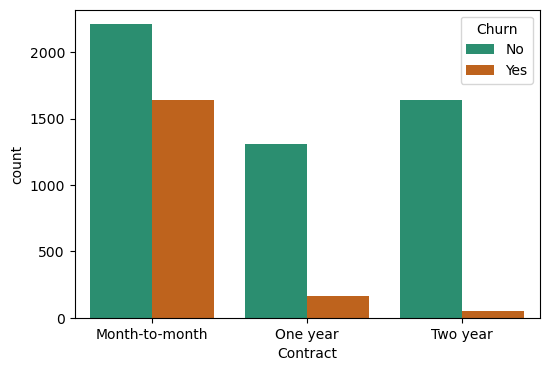

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x ="Contract",palette="Dark2",hue="Churn");

Customers are more likely to churn with month-to-month contracts

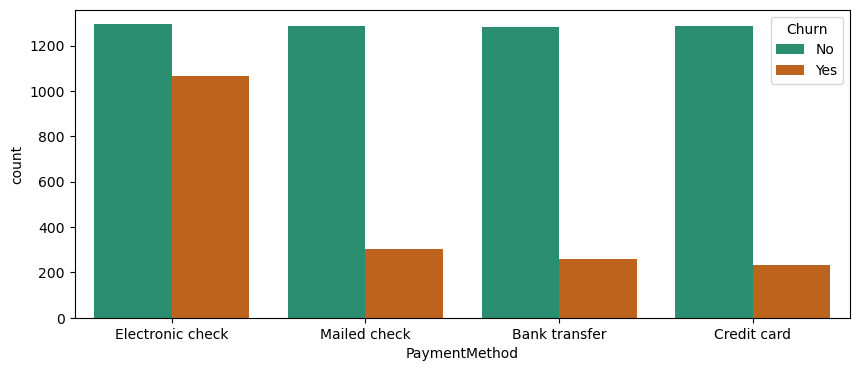

In [37]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x ="PaymentMethod",palette="Dark2",hue="Churn");

Customers are more likely to churn with Electonnic checks

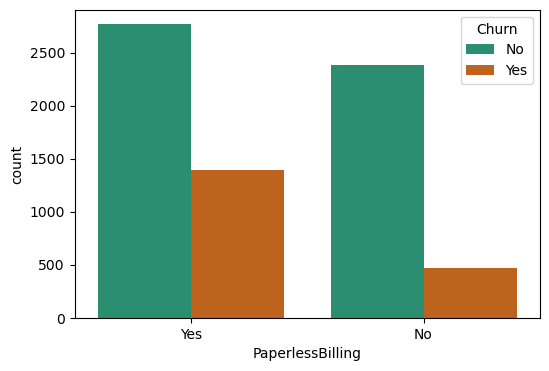

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x ="PaperlessBilling",palette="Dark2",hue="Churn");

Customers with paperless billing have higher churn rates.

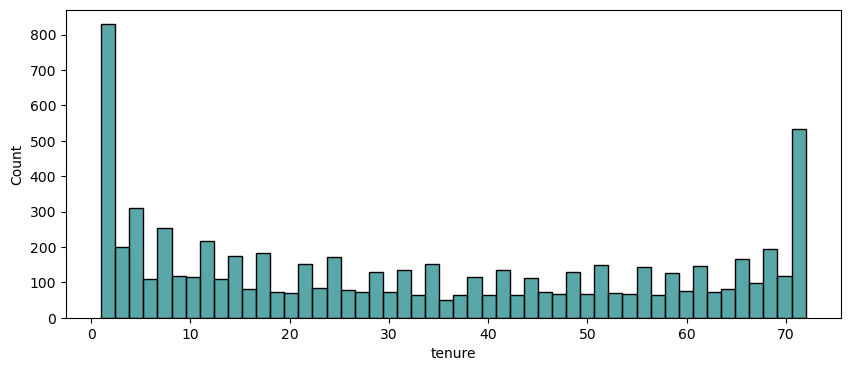

In [39]:
plt.figure(figsize=(10,4))
sns.histplot(data=df,x="tenure",bins=50,color="#228A8D");

Lots of customer leave after one or two month 

<Figure size 2000x600 with 0 Axes>

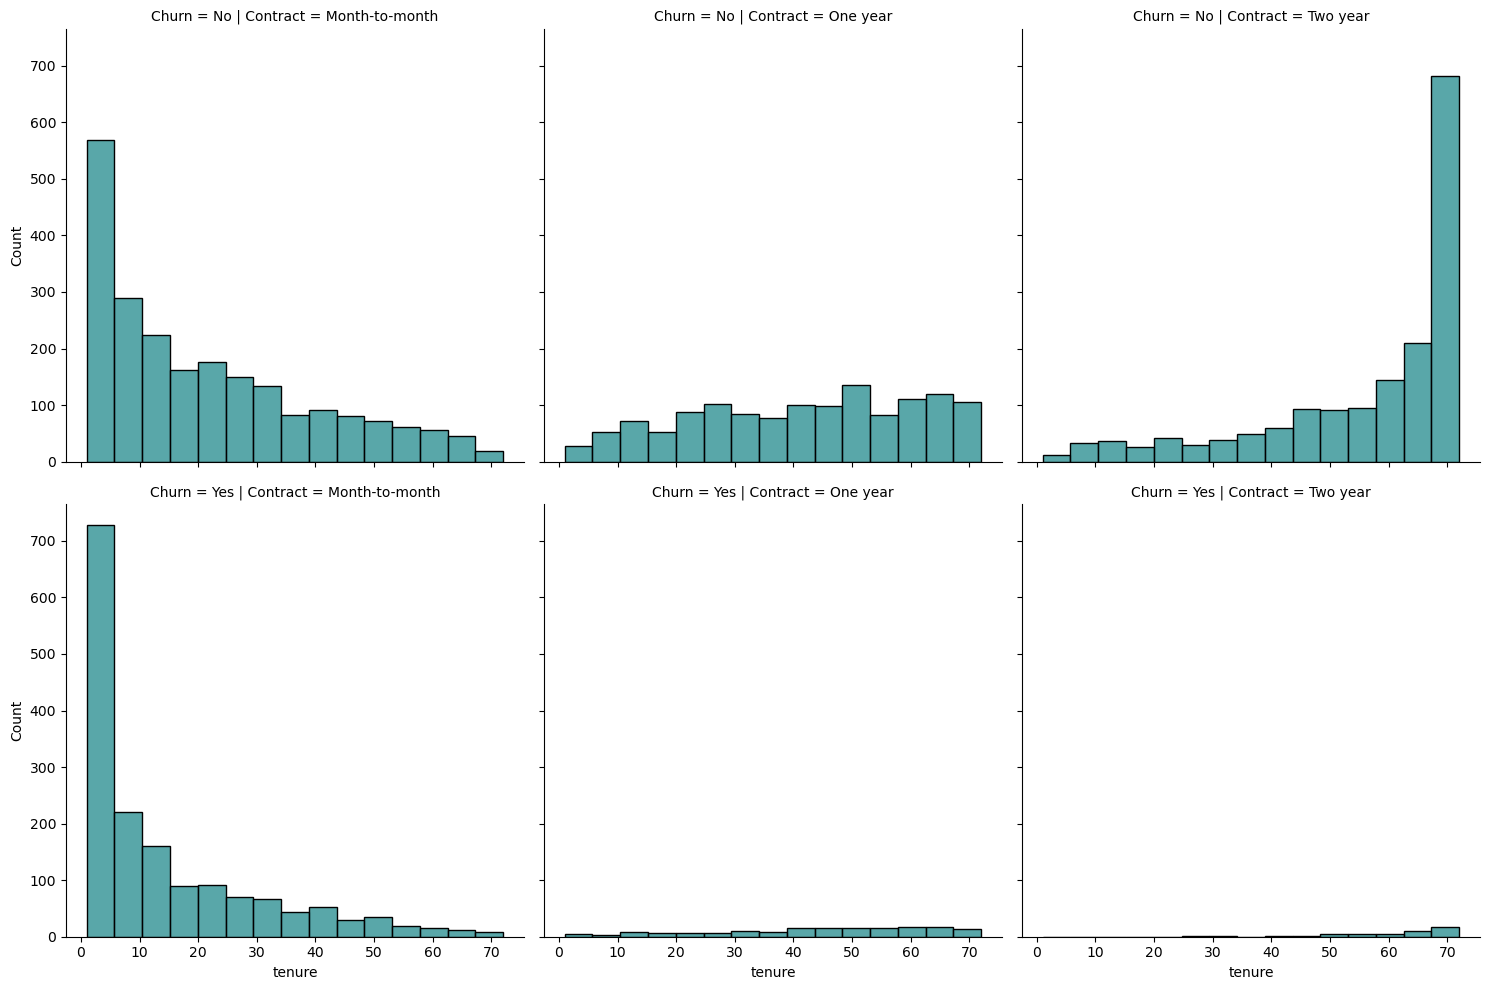

In [40]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',col='Contract',row='Churn',color="#228A8D");

* must reduce ealry churn  on month to month 
* try to reduce late churn of month to month payment customers by giving them promotions or giving them one/two month cantact 

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

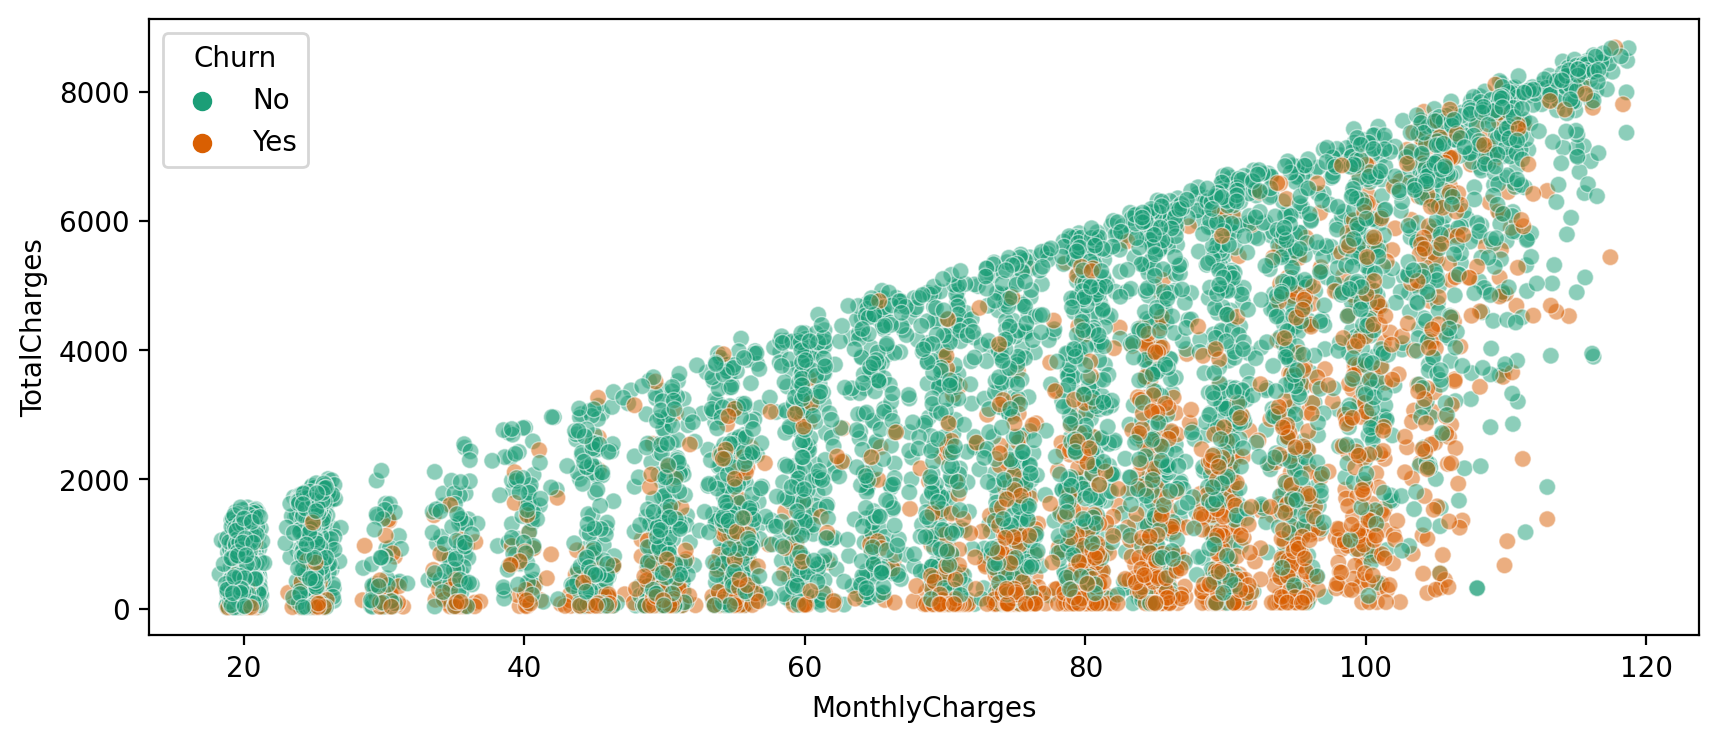

In [41]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')

 Lot of people churn when their monthly charges are higher

In [42]:
chrunCount = df.groupby(['Churn', 'tenure']).count()
churn_yes = chrunCount.loc['Yes']
churn_no = chrunCount.loc['No']


In [43]:
churn_rate = (churn_yes/(churn_yes+churn_no)) * 100

In [44]:
churn_rate["gender"]

tenure
1     62.267343
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: gender, Length: 72, dtype: float64

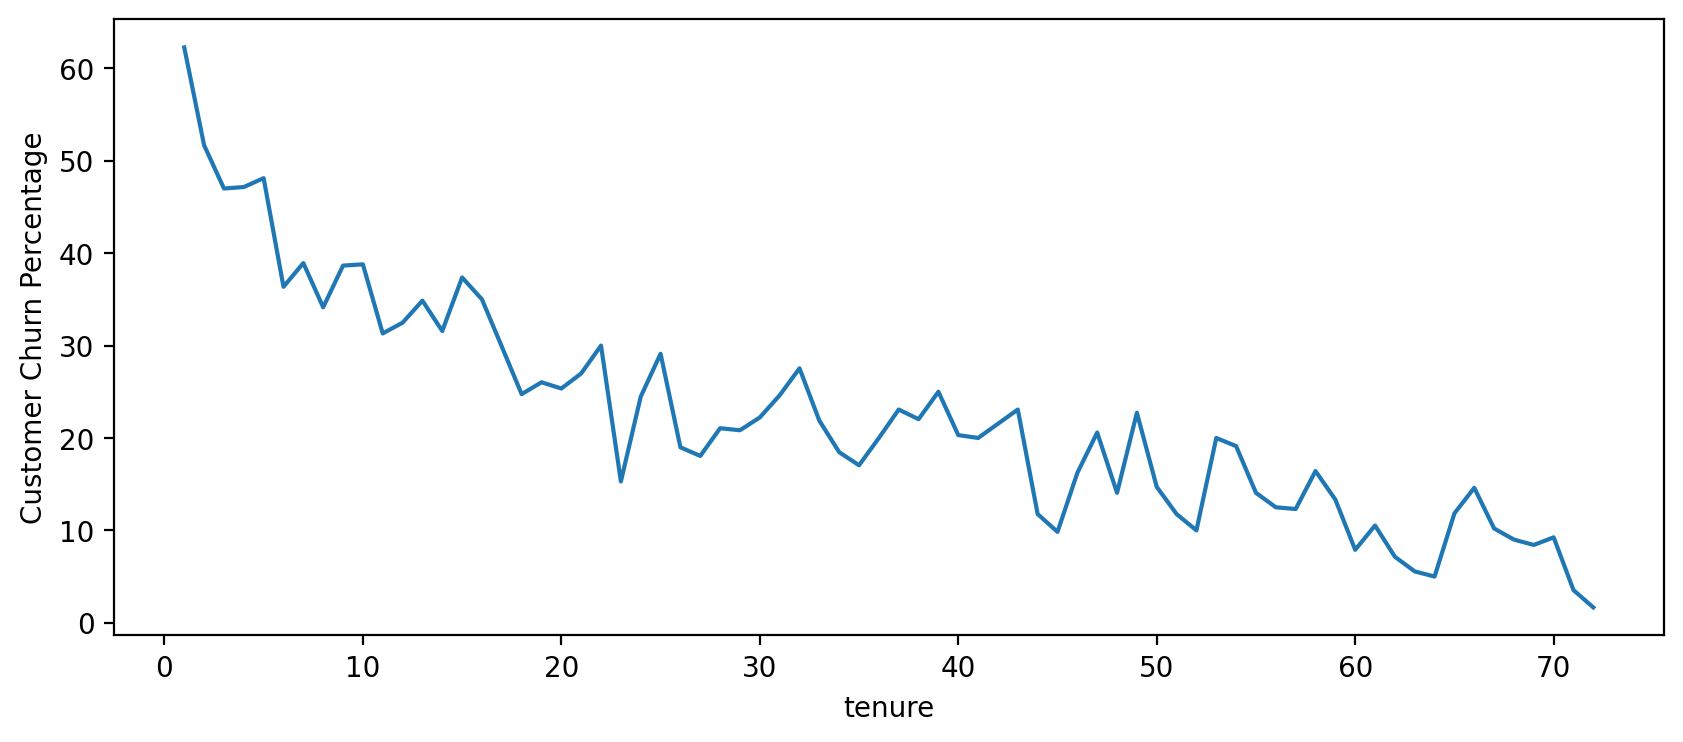

In [45]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate["gender"].plot()
plt.ylabel('Customer Churn Percentage');

If customers stay for a long time, they are less likely to churn.

In [46]:
def to_years(tenure):
    if tenure < 13:
        return '1 year'
    elif tenure < 25:
        return '2 year'
    elif tenure < 37:
        return '3 year'
    elif tenure < 49:
        return '4 year'
    else:
        return "Over 4 Year"

In [47]:
df['Years'] = df['tenure'].apply(to_years)

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

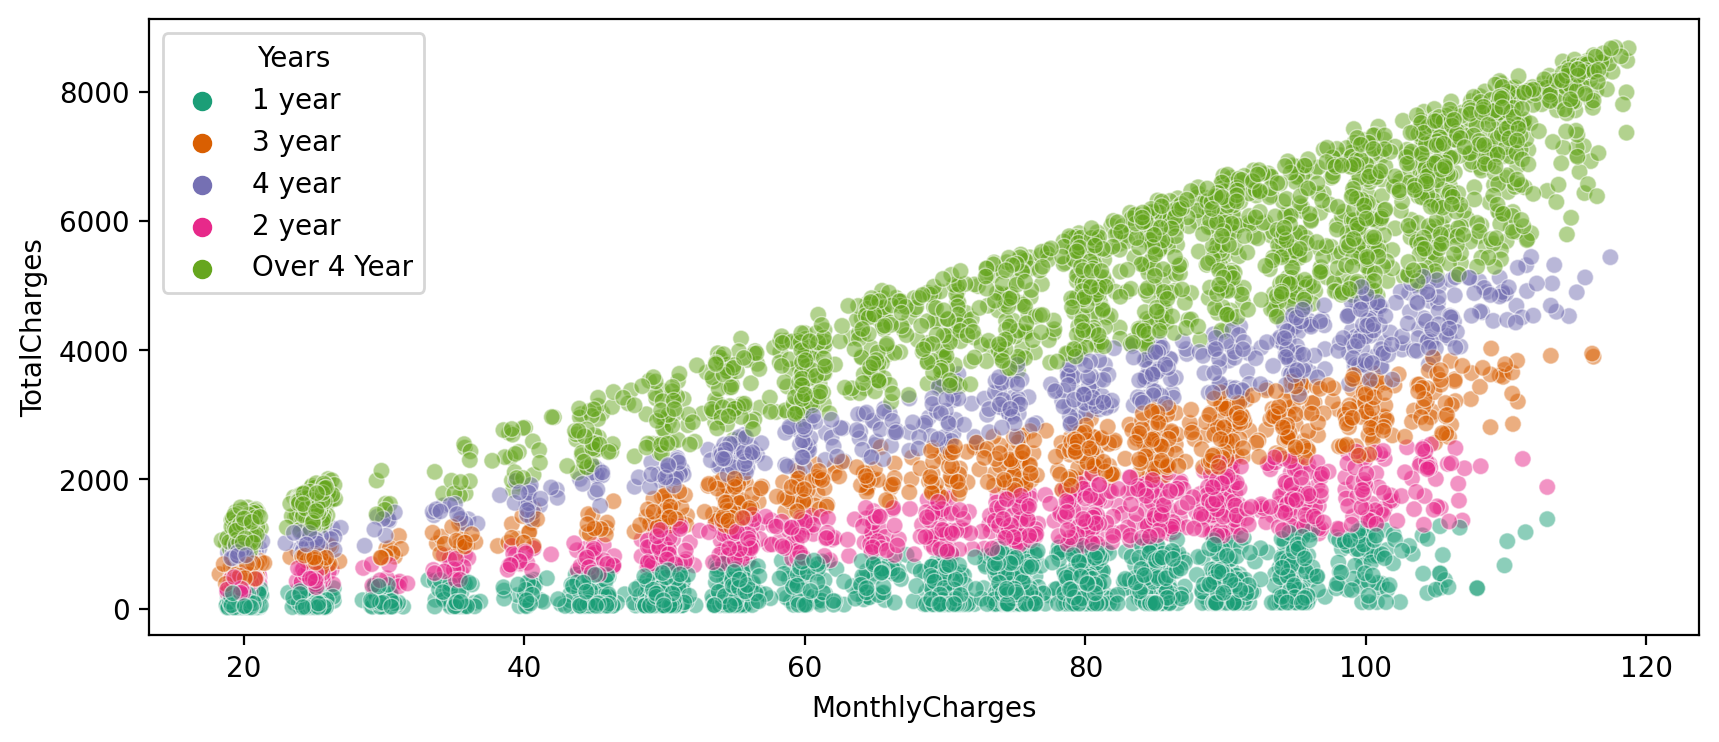

In [48]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Years', linewidth=0.5,alpha=0.5,palette='Dark2')

*Lots of Total charges are paid by long term one as a business we rather want total charges than monthly charges
*Lots of Total charges are paid by long term one as a business we rather want total charges than monthly charges

<Axes: xlabel='Years', ylabel='count'>

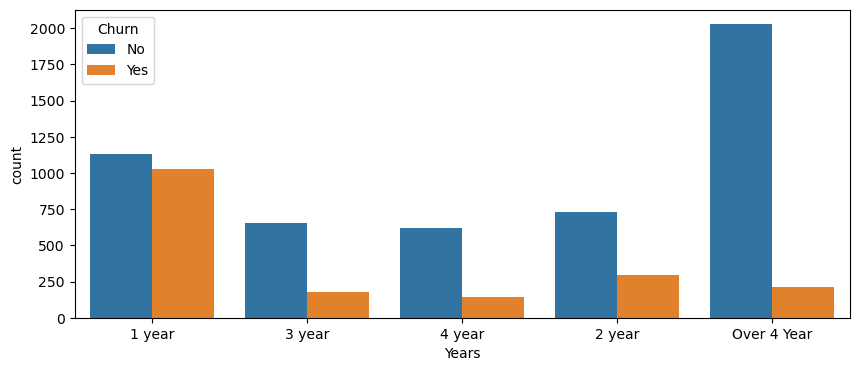

In [49]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='Years',hue='Churn')

In [50]:
df=df.drop("Years",axis=1)

# Data Transformation

In [51]:
# 3. Data Transformation
# Flag to check if any binary columns are found
found_binary_cols = False

# Convert binary categorical columns to numerical values and provide meaningful prints
for col in df.columns:
    if df[col].dtype == 'object' and df[col].nunique() == 2 and set(df[col].unique()) == {'No', 'Yes'}:
        df[col] = df[col].map({'No': 0, 'Yes': 1})
        print(f"Binary categorical column '{col}' successfully encoded.")
        found_binary_cols = True

# If no binary categorical columns are found, print a message
if not found_binary_cols:
    print("No binary categorical columns found for encoding.")

Binary categorical column 'Partner' successfully encoded.
Binary categorical column 'Dependents' successfully encoded.
Binary categorical column 'PhoneService' successfully encoded.
Binary categorical column 'PaperlessBilling' successfully encoded.
Binary categorical column 'Churn' successfully encoded.


#  Feature Engineering

In [52]:
# Identify categorical columns with up to 10 unique values
categorical_columns = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() <= 10]

# Check if there are any categorical columns with up to 12 unique values
if categorical_columns:
    # Encode categorical variables using one-hot encoding for columns with up to 12 unique values
    df = pd.get_dummies(df, columns=categorical_columns)
    
    # Print messages for successfully encoded columns
    for col in categorical_columns:
        print(f"Nominal categorical column '{col}' successfully encoded.")
    
    # Convert boolean columns to integers
    for col in df.columns:
        if df[col].nunique() == 2 and df[col].dtype == bool:
            df[col] = df[col].astype(int)
else:
    print("No categorical columns with up to 12 unique values found.")

Nominal categorical column 'gender' successfully encoded.
Nominal categorical column 'MultipleLines' successfully encoded.
Nominal categorical column 'InternetService' successfully encoded.
Nominal categorical column 'OnlineSecurity' successfully encoded.
Nominal categorical column 'OnlineBackup' successfully encoded.
Nominal categorical column 'DeviceProtection' successfully encoded.
Nominal categorical column 'TechSupport' successfully encoded.
Nominal categorical column 'StreamingTV' successfully encoded.
Nominal categorical column 'StreamingMovies' successfully encoded.
Nominal categorical column 'Contract' successfully encoded.
Nominal categorical column 'PaymentMethod' successfully encoded.


In [53]:
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,1990.50,0,0,...,0,0,1,0,1,0,0,0,0,1
7039,0,1,1,72,1,1,103.20,7362.90,0,1,...,0,0,1,0,1,0,0,1,0,0
7040,0,1,1,11,0,1,29.60,346.45,0,1,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,4,1,1,74.40,306.60,1,0,...,1,0,0,1,0,0,0,0,0,1


#  Data Scaling

In [54]:
# Initialize the MinMaxScaler
scaler = StandardScaler()

# Select the numerical columns that need to be scaled
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply Min-Max scaling to the selected numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print("tenure, MonthlyCharges, and TotalCharges columns scaled using standard scaling.")

tenure, MonthlyCharges, and TotalCharges columns scaled using standard scaling.


# Seprating dependent & independent variables

In [55]:
X=df.drop("Churn",axis=1)

In [56]:
y=df["Churn"]

# Data Splitting

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Sampling

In [58]:
sm = SMOTEENN()

sm = SMOTEENN(random_state=101)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [59]:
XR_train, XR_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=42)

In [60]:
y_train.value_counts()

Churn
0    4110
1    1498
Name: count, dtype: int64

In [61]:
y_resampled.value_counts()

Churn
1    3622
0    2835
Name: count, dtype: int64

In [62]:
len(y_train)

5608

In [63]:
len(yr_train)

5165

# Training

## Desicion Tree

In [64]:
dt_classifier_wh = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [65]:
dt_classifier_wh.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [66]:
y_pred_dt_wh = dt_classifier_wh.predict(X_test)

In [67]:
accuracy_wh = accuracy_score(y_test, y_pred_dt_wh)
precision_wh=precision_score(y_test, y_pred_dt_wh)
recall_wh=recall_score(y_test, y_pred_dt_wh) 

In [68]:
accuracy_wh

0.8052781740370899

In [69]:
precision_wh

0.6482758620689655

In [70]:
recall_wh

0.5236768802228412

In [71]:
confusion_matrix(y_test,y_pred_dt_wh)

array([[941, 102],
       [171, 188]], dtype=int64)

In [72]:
print(classification_report(y_test,y_pred_dt_wh))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1043
           1       0.65      0.52      0.58       359

    accuracy                           0.81      1402
   macro avg       0.75      0.71      0.73      1402
weighted avg       0.80      0.81      0.80      1402



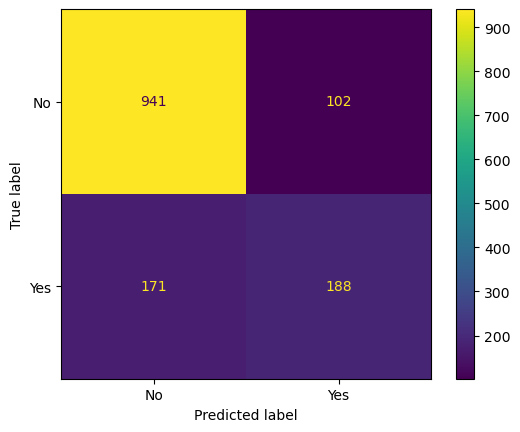

In [73]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_dt_wh),display_labels=["No","Yes"]).plot()

## Resampled training

In [74]:
dt_classifier_wh_resampled = DecisionTreeClassifier(random_state = 100,criterion = "gini",max_depth=6, min_samples_leaf=8) 

In [75]:
dt_classifier_wh_resampled.fit(XR_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [76]:
y_pred_dt_wh_resampled = dt_classifier_wh_resampled.predict(XR_test)

In [77]:
accuracy_resampled = accuracy_score(yr_test, y_pred_dt_wh_resampled)
precision_resampled = precision_score(yr_test, y_pred_dt_wh_resampled)
recall_resampled = recall_score(yr_test, y_pred_dt_wh_resampled) 

In [78]:
accuracy_resampled

0.9195046439628483

In [79]:
precision_resampled

0.9195088676671214

In [80]:
recall_resampled

0.9374130737134909

In [81]:
confusion_matrix(yr_test,y_pred_dt_wh_resampled)

array([[514,  59],
       [ 45, 674]], dtype=int64)

In [82]:
print(classification_report(yr_test,y_pred_dt_wh_resampled))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       573
           1       0.92      0.94      0.93       719

    accuracy                           0.92      1292
   macro avg       0.92      0.92      0.92      1292
weighted avg       0.92      0.92      0.92      1292



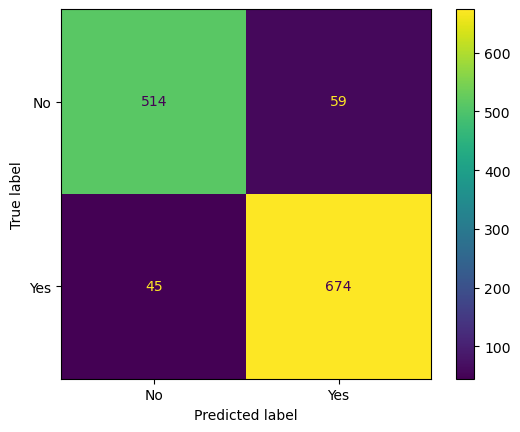

In [83]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(yr_test,y_pred_dt_wh_resampled),display_labels=["No","Yes"]).plot()

## Hyperparameter Tuning

In [84]:
base_dt_model = DecisionTreeClassifier(random_state=100)

param_grid = {'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8]}

grid_search_dt = GridSearchCV(base_dt_model, param_grid=param_grid, cv=5)

grid_search_dt.fit(XR_train, yr_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10]})

In [85]:
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

In [86]:
best_params_dt

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [87]:
best_score_dt

0.9310745401742497

In [88]:
best_model_dt = grid_search_dt.best_estimator_

In [89]:
y_pred_dt = best_model_dt.predict(XR_test)

In [90]:
model_score_dt = best_model_dt.score(XR_test, yr_test)

In [91]:
model_score_dt

0.9256965944272446

In [92]:
print(classification_report(yr_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       573
           1       0.94      0.93      0.93       719

    accuracy                           0.93      1292
   macro avg       0.92      0.93      0.92      1292
weighted avg       0.93      0.93      0.93      1292



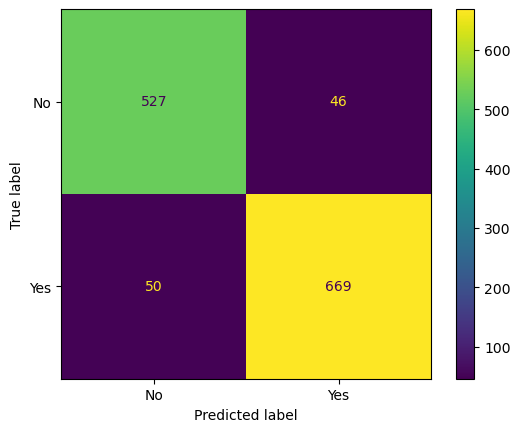

In [93]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(yr_test,y_pred_dt),display_labels=["No","Yes"]).plot()

In [94]:
# plt.figure(figsize=(12,8))
# plot_tree(grid_search_dt.best_estimator_);

In [95]:
decision_tree_imp=grid_search_dt.best_estimator_.feature_importances_
imp_features=pd.DataFrame(index=XR_train.columns,data=decision_tree_imp,columns=["Importance"])
decision_tree_top_10=imp_features.nlargest(columns=["Importance"],n=10)

In [96]:
decision_tree_top_10

,Importance
Contract_Month-to-month,0.474211
MonthlyCharges,0.079680
DeviceProtection_No internet service,0.068951
TotalCharges,0.061120
tenure,0.058701
Contract_Two year,0.033842
InternetService_DSL,0.027552
OnlineSecurity_Yes,0.016872
PaperlessBilling,0.015352
OnlineSecurity_No,0.014471


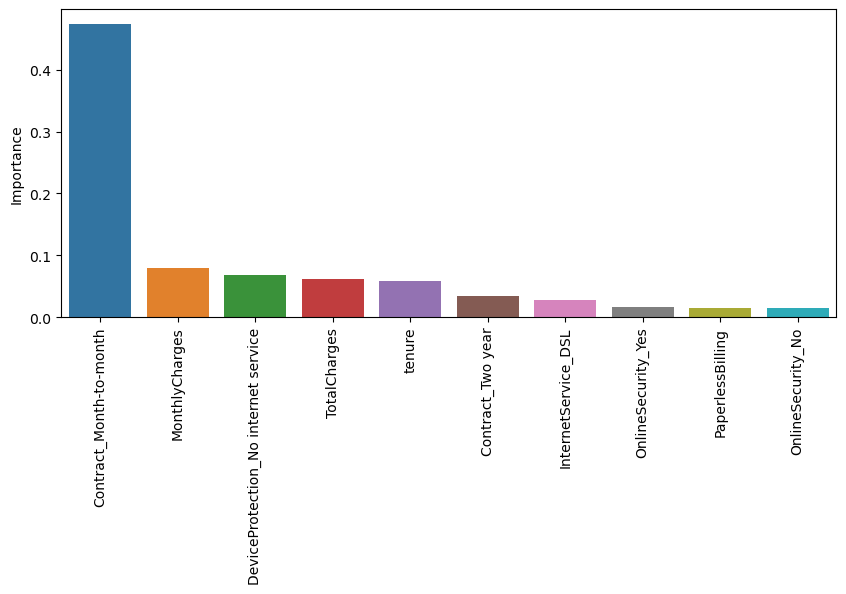

In [97]:
plt.figure(figsize=(10,4))
sns.barplot(data=decision_tree_top_10,x=decision_tree_top_10.index,y="Importance")
plt.xticks(rotation=90);

# Random Forest

## Resampled training

# Hyper Tuning

# SVM

# Resampled training

## Hyperparameter Tuning

## Logistic Regression

# Resampled training